<a href="https://colab.research.google.com/github/dearmypoem/2022-2-ITB/blob/main/health_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 인코딩으로 해결되지 않는 한글 깨짐 현상으로 인한 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
## 폰트 적용
import matplotlib.pyplot as plt
plt.rc("font", family="NanumBarunGothic") 

In [ ]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health.csv", encoding = "UTF8")

## 엑셀로 데이터 전처리

## 결측 데이터가 많은 행/열, 같은 값만 제시된 일자 관련 항목 제거
## 흡연상태, 음주여부, 요단백 결측치는 최빈값으로 보간
## 신장 데이터, 체중 데이터 결합하여 BMI 항목 추가
## 수축기혈압, 이완기혈압 결합하여 고혈압 기준에 의한 관련 항목 5가지 추가
## 고혈압 기준 자료 출처 : https://health.kdca.go.kr/healthinfo/biz/health/ntcnInfo/mediaRecsroom/imageRecsroom/imageRecsroomView.do?cntnts_cl_sn=28150&cntnts_cours=176cbf244744
## BMI~감마지티피 항목 MinMax정규화
## 성별코드(남,여), 흡연상태(아니오, 예), 음주여부(아니오, 예), 고혈압 단계별 해당사항(비해당, 해당)는 (0,1)로 대체, 흡연상태의 'NotNow'는 2로 대체

display(health.head())
print(health.info())
print(health.describe())

,시도코드,성별코드,연령대코드(5세단위),신장(5CM단위),체중(5Kg 단위),흡연상태,음주여부,시력(좌),시력(우),청력(좌),...,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,주의혈압,고혈압전단계,고혈압1기,고혈압2기,수축기단독고혈압
0,36,1,9,165,60,0,0,1.2,1.5,1,...,0.664430,0.114754,0.026125,0.021853,0.007762,0,1,0,0,0
1,27,0,13,150,65,0,0,0.8,0.8,1,...,0.510067,0.049180,0.021771,0.011364,0.005175,0,0,0,0,0
2,11,0,12,155,55,0,0,0.6,0.7,1,...,0.516779,0.071038,0.034833,0.020105,0.001725,0,1,0,0,0
3,31,1,13,160,70,0,0,1.0,1.0,1,...,0.758389,0.125683,0.089985,0.083042,0.029754,0,1,0,0,0
4,41,0,12,155,50,0,0,1.5,1.2,1,...,0.489933,0.071038,0.021771,0.013112,0.004743,0,0,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도코드         9912 non-null   int64  
 1   성별코드         9912 non-null   int64  
 2   연령대코드(5세단위)  9912 non-null   int64  
 3   신장(5CM단위)    9912 non-null   int64  
 4   체중(5Kg 단위)   9912 non-null   int64  
 5   흡연상태         9912 non-null   int64  
 6   음주여부         9912 non-null   int64  
 7   시력(좌)        9912 non-null   float64
 8   시력(우)        9912 non-null   float64
 9   청력(좌)        9912 non-null   int64  
 10  청력(우)        9912 non-null   int64  
 11  요단백          9912 non-null   int64  
 12  BMI          9912 non-null   float64
 13  허리둘레         9912 non-null   float64
 14  수축기혈압        9912 non-null   float64
 15  이완기혈압        9912 non-null   float64
 16  식전혈당(공복혈당)   9912 non-null   float64
 17  혈색소          9912 non-null   float64
 18  혈청크레아티닌      9912 non-null   float64
 19  (혈청지오티

# 1. 연령대코드-BMI

- 산점도 그래프를 이용하여 연령대코드별 BMI의 분포 상태를 확인하고자 하였다.
- 상대적으로 낮은 연령대에서는 낮은 BMI값부터 높은 BMI값까지 비교적 고르게 분포하고 있으며, 고연령대의 경우 이상치가 대체로 여성인 것으로 확인되었다.
- 해당 자료를 통해 저연령대 또는 고연령대 여성에 대한 비만 예방 및 치료를 시행하여 보건 증진에 힘쓸 수 있을 것이라고 예상할 수 있다.

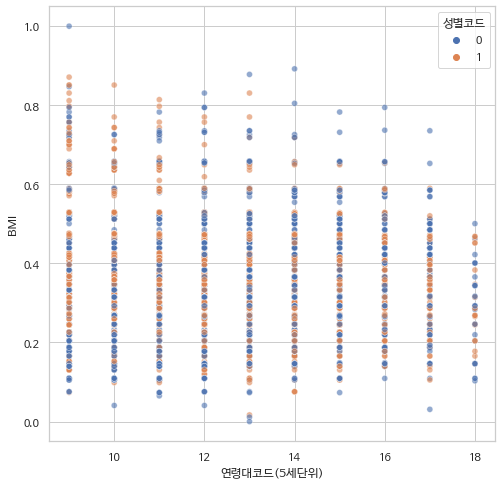

In [ ]:
## 산점도 그래프 : x축 연령대코드(5세단위), y축 BMI

plt.figure(figsize=(8, 8))
sns.scatterplot(data = health, x = "연령대코드(5세단위)", y = "BMI", hue = "성별코드", alpha=.6)
plt.show()

# 2. 시도코드-주의혈압

- 막대 그래프를 이용하여 시도코드별 주의혈압(수축기혈압이 120 이상 129 이하이며 이완기혈압이 80 미만인 경우. 고혈압 1기 등 상위 단계에 속하는 경우는 제외함.) 해당자의 비율을 알아보고자 하였다. 이때, 주의혈압은 0(비해당)과 1(해당)으로 표현하였으므로 주의혈압의 평균을 y로 표현한 그래프는 집단 내에서 주의혈압 해당자가 차지하는 비율을 나타낸다.
- 시도코드별 주의혈압 해당자 비율은 시도코드 29에 속하는 남성이 가장 높은 것으로 확인되었다.
- 해당 자료를 통해 시도코드 29, 즉 광주광역시는 남성 시민들을 주요 대상으로 고혈압 예방 사업 등을 행하여 시민들의 고혈압 위험을 줄이도록 지원할 수 있을 것이라고 예상할 수 있다.

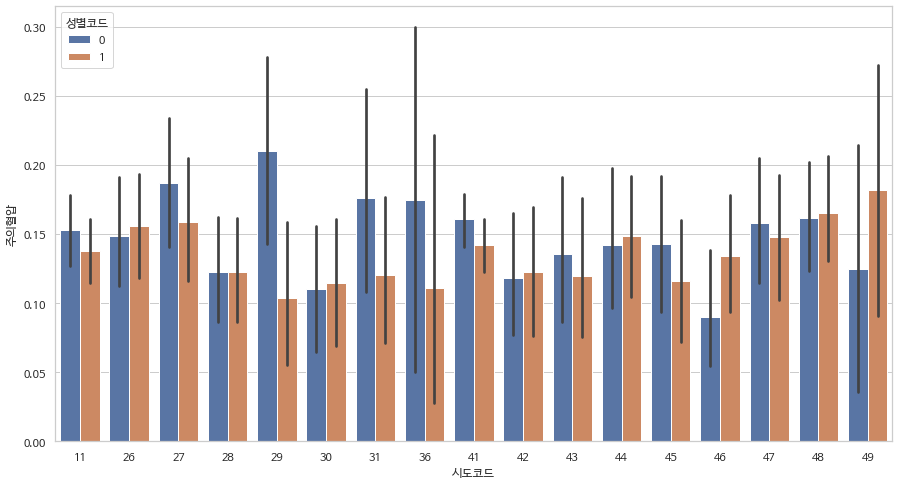

In [ ]:
## 막대그래프 : x축 시도코드, y축 주의혈압

plt.figure(figsize=(15, 8))
sns.barplot(data = health, x = "시도코드", y = "주의혈압", hue="성별코드")
plt.show()

# 3. 흡연상태-혈색소

- 상자그림을 이용하여 흡연상태별 혈색소 데이터의 분포를 확인하고자 하였다.
- 비흡연자, 흡연자, 금연자 집단 중 비흡연자의 혈색소 수치 사분위가 가장 낮게 위치하고 있으며 사분위를 포함하여 최솟값, 중앙값, 최댓값, 상자수염 모두 흡연자 집단이 가장 높게 위치함을 알 수 있다.
- 시중에 흡연자는 비흡연자보다 혈색소 수치가 높다는 정보가 있는데, 혈색소 수치가 높은 흡연자에게 금연을 권장하기 위하여 해당 자료를 제시할 수 있다.

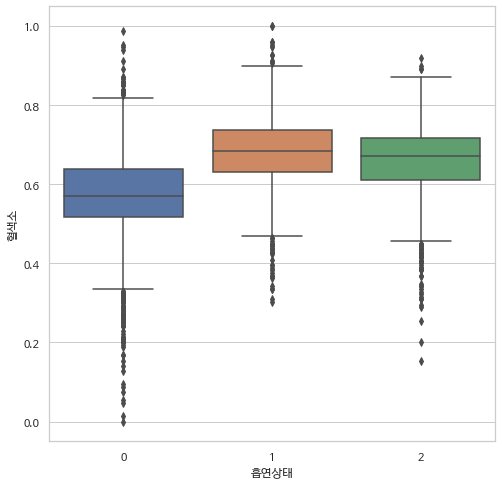

In [ ]:
## 상자그림 : x축 흡연상태, y축 혈색소

plt.figure(figsize=(8, 8))
sns.boxplot(data = health, x = "흡연상태", y = "혈색소")
plt.show()